# Tarefa 06 - Leonardo Gargitter

In [18]:
from pylab import *
from scipy.signal import *
from matplotlib.pyplot import *

## 1) Considere o sinal x a soma de 3 senoides: n=0:128; x = sin(6*pi*n/32) + sin(12*pi*n/32) + sin(18*pi*n/32)

In [32]:
n = arange(129)
x = sin(6*pi*n/32) + sin(12*pi*n/32) + sin(18*pi*n/32)
X = fftshift(abs(fft(x)))
w = fftshift(fftfreq(len(n))*2*pi)

## 2) Projete um filtro FIR de ordem 10 para deixar passar somente a segunda senoide, por janelamento (função firwin() no Python ou fir1() no Matlab).

In [34]:
Wn = concatenate((12/32*0.8, 12/32*1.2), axis=None)

FIR_b = firwin(11,Wn,pass_zero='bandpass')
w_FIR, H_FIR = freqz(FIR_b, 1, w)

## 3) Projete um filtro IIR de ordem 10, semelhante ao anterior, usando a função butter()

In [35]:
butter_b, butter_a = butter(10, Wn, btype='bandpass')
w_butter, H_butter = freqz(butter_b, butter_a, w)

## 4) Projete um filtro IIR de ordem 6, semelhante ao anterior, usando a função ellip()

In [36]:
ellip_b, ellip_a = ellip(10, 0.3, 40, Wn, btype='bandpass')
w_ellip, H_ellip = freqz(ellip_b, ellip_a, w)

## 5) Plote o espectro do sinal x juntamente com as respostas em frequência dos três filtros.

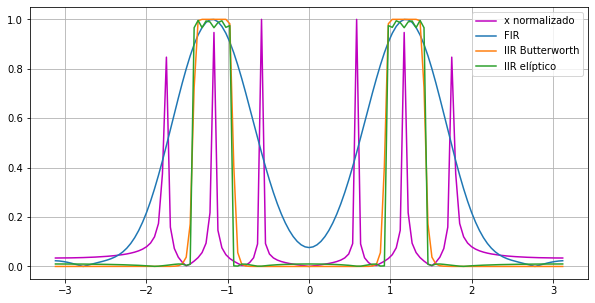

In [37]:
figure(figsize=(10,5))
plot(w, X/max(X),'m', label ='x normalizado')
plot(w_FIR, abs(H_FIR), label = 'FIR')
plot(w_butter, abs(H_butter), label = 'IIR Butterworth')
plot(w_ellip, abs(H_ellip), label = 'IIR elíptico')
grid()
legend()
show()

## 6) Filtre o sinal com cada filtro, e plote no mesmo eixo os três sinais filtrados.

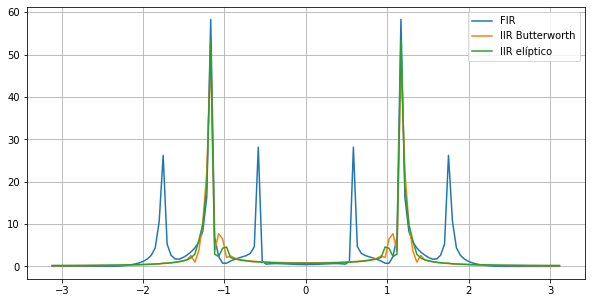

In [38]:
x_FIR = lfilter(FIR_b, 1, x)
x_butter = lfilter(butter_b, butter_a, x)
x_ellip = lfilter(ellip_b, ellip_a, x)

figure(figsize=(10,5))
plot(w_FIR, fftshift(abs(fft(x_FIR))), label = 'FIR')
plot(w_butter, fftshift(abs(fft(x_butter))), label = 'IIR Butterworth')
plot(w_ellip, fftshift(abs(fft(x_ellip))), label = 'IIR elíptico')
grid()
legend()
show()


## 7) Qual dos três filtros rejeitou melhor as frequências baixa e alta ?

Pelo gráfico do item anterior fica claro que o filtro que apresentou melhor desempenho filtrando as frequências baixas e altas foi o IIR elíptico.

## 8) Plote no mesmo eixo a resposta em frequência do filtro FIR obtida de duas formas diferentes: 

### a) freqz() 

### b) T.F. da resposta ao impulso. (obs.: lembre que os próprios coeficiente do filtro são a resposta ao impulso).

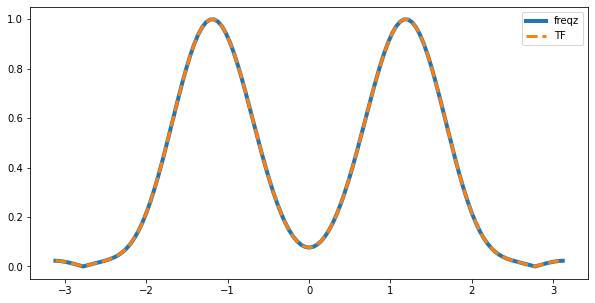

In [39]:
b = concatenate((FIR_b, zeros(len(n)-len(FIR_b))), axis=None)
B = fftshift(fft(b))


figure(figsize=(10,5))
plot(w_FIR, abs(H_FIR),linewidth=4, label = 'freqz')
plot(w_FIR, abs(B),'--',linewidth=3, label='TF')
legend()
show()